# Course: BUSA 523
## Professor: Dr. Vinayaka Gude

## Project: Haberman Breast Cancer Survival Prediction Model



### Student: Eniola Ayanlola         
##### Due Date: March 9, 2022

# Question 1

In [45]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

In [46]:
#Start by loading the required libraries and the data.

import pandas as pd

import numpy as np

import statistics as st

# import the data - make status object

df = pd.read_csv("haberman_data.csv", dtype={"Status": object})


#Calculate Mean

#df.mean()         #or df.mean(axis = 0)

#OR calculate mean of a specific one: Age, Year, Nodes, Status

print("The Average Age at the time of patient's operation: ", int(df.loc[:,'Age'].mean()))

print("The Average year of Patient's operation: 19" + str(int(df.loc[:,'Year'].mean())))

print("The Average Number of positive axillary nodes detected: ",int(df.loc[:,'Nodes'].mean()))

#OR The code below calculates the mean of the first three rows.

df.mean(axis = 1)[0:3]

The Average Age at the time of patient's operation:  52
The Average year of Patient's operation: 1962
The Average Number of positive axillary nodes detected:  4


C:\Users\eniol\AppData\Local\Temp/ipykernel_10728/2030023777.py:28: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



0    31.666667
1    31.666667
2    31.666667
dtype: float64

In [47]:
#Calculate Median

#df.median()      #or df.median(axis = 0)

#OR calculate median of a specific one: Age, Year, Nodes, Status

print("The Median Age at the time of patient's operation: ", int(df.loc[:,'Age'].median()))

print("The Median year of Patient's operation: 19" + str(int(df.loc[:,'Year'].median())))

print("The Median Number of positive axillary nodes detected: ",int(df.loc[:,'Nodes'].median()))

The Median Age at the time of patient's operation:  52
The Median year of Patient's operation: 1963
The Median Number of positive axillary nodes detected:  1


In [48]:
#Calculate Mode

#df.mode(axis = 0)           #or df.mode(axis = 0)

#OR calculate mode of a specific one: Age, Year, Nodes, Status

print("The Mode Age at the time of patient's operation: ", int(df.loc[:,'Age'].mode()))

print("The Mode year of Patient's operation: 19" + str(int(df.loc[:,'Year'].mode())))

print("The Mode Number of positive axillary nodes detected: ",int(df.loc[:,'Nodes'].mode()))

The Mode Age at the time of patient's operation:  52
The Mode year of Patient's operation: 1958
The Mode Number of positive axillary nodes detected:  0


In [49]:
#Measures of Dispersion

#Calculate the Standard Deviations

#df.std()              #or df.std(axis = 0)

#OR calculate std dev. of a specific one: Age, Year, Nodes, Status

print("The Standard Deviation for Age at the time of patient's operation: ", df.loc[:,'Age'].std())

print("The Standard Deviation for year of Patient's operation: " + str(df.loc[:,'Year'].std()))

print("The Standard Deviation for positive axillary nodes detected: ",df.loc[:,'Nodes'].std())

The Standard Deviation for Age at the time of patient's operation:  10.80345234930328
The Standard Deviation for year of Patient's operation: 3.249404663223851
The Standard Deviation for positive axillary nodes detected:  7.189653506248565


In [50]:
#Measures of Dispersion

#Calculate the Variance

#df.var()              #or df.var(axis = 0)

#OR calculate variance of a specific one: Age, Year, Nodes, Status

print("The Variance for Age at the time of patient's operation: ", df.loc[:,'Age'].var())

print("The Variance for year of Patient's operation: " + str(df.loc[:,'Year'].var()))

print("The Variance for positive axillary nodes detected: ",df.loc[:,'Nodes'].var())

The Variance for Age at the time of patient's operation:  116.71458266366655
The Variance for year of Patient's operation: 10.558630665380909
The Variance for positive axillary nodes detected:  51.69111753991228


<IPython.core.display.Javascript object>


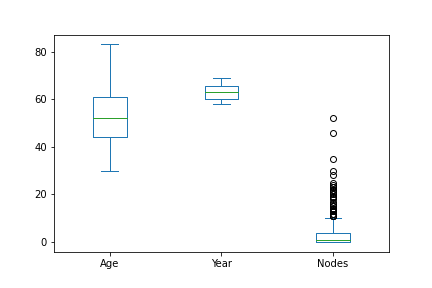

<AxesSubplot:>

In [51]:
# Box plot- to find if there are any outliers in the data

%matplotlib notebook

df.plot.box()

### Skewness

- Skewness, which is the measure of the symmetry, or lack of it, for a real-valued random variable about its mean. 
- The skewness value can be positive, negative, or undefined. 
- In a perfectly symmetrical distribution, the mean, the median, and the mode will all have the same value. 

- The variables, 'Year' and 'Nodes' in our data are not symmetrical, resulting in different values of the central tendency:
        - Year, and Nodes are positively skewed, as shown in the histogram and the data table below.
- The 'Age' variable is basically symmerical. This shows in the mean, median and mode all being 52 years old.

In [52]:
# Calculate the skewness of the numerical variables using the skew() function, as shown below.
 

print(df.skew())

Age       0.146505
Year      0.078755
Nodes     2.983823
Status    1.071928
dtype: float64


### Skewness

Output for the above:

Age       0.146505

Year      0.078755

Nodes     2.983823

Status    1.071928

dtype: float64

The skewness values can be interpreted in the following manner:

 

    Highly skewed distribution: If the skewness value is less than −1 or greater than +1.

 

    Moderately skewed distribution: If the skewness value is between −1 and −½ or between +½ and +1.

    Approximately symmetric distribution: If the skewness value is between −½ and +½.

<IPython.core.display.Javascript object>


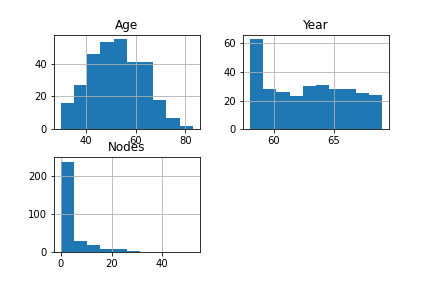

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Year'}>],
       [<AxesSubplot:title={'center':'Nodes'}>, <AxesSubplot:>]],
      dtype=object)

In [53]:
# Skewness - look at the histogram

df.hist()

### Descriptive Statistics

The output below prints the important summary statistics of all the numerical variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation. We can also calculate the IQR using the 25th and 75th percentile values.

However, the 'describe()' function only prints the statistics for the quantitative or numerical variable. In order to print the similar statistics for all the variables, an additional argument, include='all', needs to be added, as shown in the line of code below.


In [54]:
# Summary Statistics

df.describe()

,Age,Year,Nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


###### Interquartile Range (IQR)

The Interquartile Range (IQR) is a measure of statistical dispersion, and is calculated as the difference between

the upper quartile (75th percentile) and the lower quartile (25th percentile). The IQR is also a very important

measure for identifying outliers and could be visualized using a boxplot.

 

IQR can be calculated using the iqr() function. The first line of code below imports the 'iqr' function from the

scipy.stats module, while the second line prints the IQR for the variables 'Age', 'Year', 'Nodes'.

iqr for age is 16.75

iqr for year is 5.75

iqr for nodes is 4.0

In [55]:
#Interquartile Range (IQR)

from scipy.stats import iqr

#iqr(df['Age']) #iqr for age is 16.75

#iqr(df['Year'])  #iqr for year is 5.75

iqr(df['Nodes'])   #iqr for nodes is 4.0

4.0

In [56]:
# Summary Statistics - All variables

df.describe(include='all')

,Age,Year,Nodes,Status
count,306.000000,306.000000,306.000000,306
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,225
mean,52.457516,62.852941,4.026144,NaN
std,10.803452,3.249405,7.189654,NaN
min,30.000000,58.000000,0.000000,NaN
25%,44.000000,60.000000,0.000000,NaN
50%,52.000000,63.000000,1.000000,NaN
75%,60.750000,65.750000,4.000000,NaN


#### Correlation coefficients
- It's used to measure the strength and direction of the relationship between the 2 variables
- the range is  from -1 to +1
- negative values show a negative relationship
- positive values show a positive relationship
- values close to zero show a weak or no realtionship
- values less than +0.8 or greater than -0.8 are NOT considered significant

In [57]:
# a. Is there a linear association b/w Age of the patient and the "Survival status" (Status)

#correlation coefficient between the two variables - Age and Status

dff = pd.read_csv("haberman_data.csv")

AgeV = dff.Age

StatusV = dff.Status

np.corrcoef(AgeV, StatusV)[0,1]

0.06795032439910402

In [58]:
#Test if this correlation is statistically significant, by calculating the p-value associated with the Pearson 
#correlation coefficient by using the Scipy pearsonr() function, which returns the Pearson correlation coefficient

#along with the two-tailed p-value.

from scipy.stats.stats import pearsonr

pearsonr(AgeV, StatusV)

#Output: (0.06795032439910419, 0.23595785126822694) or (0.068, 0.236)

#The correlation coefficient is 0.068, 
#Therefore I would conclude that there is no statistically significant correlation between the two variables - Age and Status.


(0.0679503243991042, 0.23595785126822694)

In [59]:
# b. The Number of positive axillary nodes detected (Nodes) and  the "Survival status" (Status)

#correlation coefficient between the two variables - Nodes and Status

#The Number of positive axillary nodes detected (Nodes) and  the "Survival status" (Status)

dff = pd.read_csv("haberman_data.csv")

from scipy.stats.stats import pearsonr

NodesV = dff.Nodes

StatusV = dff.Status

#np.corrcoef(AgeV, NodesV)[0,1]                             #Will calculate only the Correlation Coeff.

pearsonr(NodesV, StatusV)                         #Will calculate the Correlation Coeff. and p-value

#Output: (0.2867675671184219, 3.3353851166589157e-07) or ((0.287, .0000003335)

#The correlation coefficient is 0.287.
# Therefore I would conclude that there is statistically significant correlation between the two variables - Nodes and Status.

(0.28676756711842183, 3.335385116659017e-07)

In [60]:
# c. Any correlation b/w Age, Nodes, Status

#from scipy.stats.stats import pearsonr

#Get 3 columns from the dataSet

#dff = pd.read_csv("haberman_data.csv")

data = pd.DataFrame(dff, columns=['Age', 'Nodes', 'Status'])

#data

#calculate correlation coefficients for all pairwise combinations

data.corr()

,Age,Nodes,Status
Age,1.000000,-0.063176,0.067950
Nodes,-0.063176,1.000000,0.286768
Status,0.067950,0.286768,1.000000


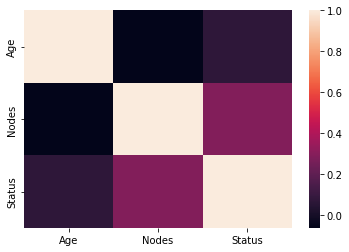

In [61]:
# Visualization - correlation

%matplotlib inline

import seaborn as sns

import matplotlib.pyplot as plt

corr = data.corr()

sns.heatmap(corr)

plt.show()

# This shows that there's no correlation between any of the variables. 

# Question 2

#### Problem Definition:

The problem here is to develop supervised learning models to predict the survival (Status) of patients who had undergone surgery for breast

cancer from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital based on the

Age of patient at time of operation (Age), Patient's year of operation (Year), and Number of positive axillary nodes detected (Nodes).

The 4 supervised learnig models are:
- Logistic Regression
- Random Forest
- Support Vector Machine
- Neural Network

Accuracy:  0.6103896103896104


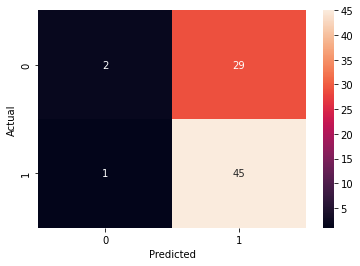

              precision    recall  f1-score   support

           0       0.67      0.06      0.12        31
           1       0.61      0.98      0.75        46

    accuracy                           0.61        77
   macro avg       0.64      0.52      0.43        77
weighted avg       0.63      0.61      0.50        77



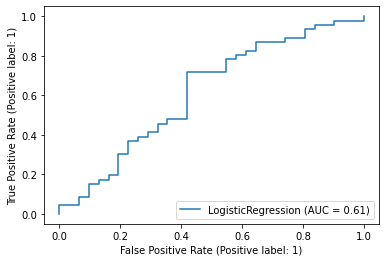

In [62]:
#2.1: Logistic Regression


import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import seaborn as sn

import matplotlib.pyplot as plt

import numpy as np

 

#df = pd.DataFrame

df = pd.read_csv("haberman_data.csv")

df.Status = df.Status.mask(df.Status == 2, 0)    #In Status column replace 2 with 0 (failure)

#df = pd.read_csv("haberman_data.csv",columns = ['Age', 'Year', 'Nodes','Status'])


X = pd.DataFrame(df, columns=['Age', 'Year', 'Nodes'])         #Indep V

y = pd.DataFrame(df, columns=['Status'])

y = np.ravel(y)           #This Converts y to a contiguous flattened array using ravel().

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

logistic_regression= LogisticRegression()

logistic_regression.fit(X_train,y_train)

y_pred=logistic_regression.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

sn.heatmap(confusion_matrix, annot=True)

print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))

plt.show()

# Print performance metrics 
print(classification_report(y_test, y_pred, labels = logistic_regression.classes_))

# Plotting ROC curve
plot_roc_curve(logistic_regression, X_test, y_test) 
plt.show()

In [63]:
#2.1: Random Forest

import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn import metrics

import seaborn as sn

import matplotlib.pyplot as plt

import numpy as np

dataset = pd.read_csv("haberman_data.csv")

#dataset.head()     # To get a high-level view of what the dataset looks like, execute the following

X = dataset.iloc[:, 0:3].values  #Verify this – In all rows, go for cols 0/1/2 - creating arrays

y = dataset.iloc[:, 3].values    # create arrays with all roow with last column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) #divide the data into training and testing sets

#Lets scale our values - optional

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

In [64]:
""" Training the Algorithm

Now that the dataset is scaled, it is time to train the random forest algorithm to solve this regression problem. Execute the following code:

"""

from sklearn.ensemble import RandomForestRegressor

 

regressor = RandomForestRegressor(n_estimators=20, random_state=0)

regressor.fit(X_train, y_train)

y_pred = regressor.predict(X_test)

 

In [65]:
"""Evaluating the Algorithm

The last and final step of solving a machine learning problem is to evaluate the performance of the algorithm. For regression problems the metrics used to evaluate an algorithm are mean absolute error, mean squared error, and root mean squared error. Execute the following code to find these values:

"""

from sklearn import metrics

print("The output for the Random Forest:")

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

The output for the Random Forest:
Mean Absolute Error: 0.38901689708141324
Mean Squared Error: 0.2660990321666301
Root Mean Squared Error: 0.5158478769624143


Fitting 4 folds for each of 180 candidates, totalling 720 fits


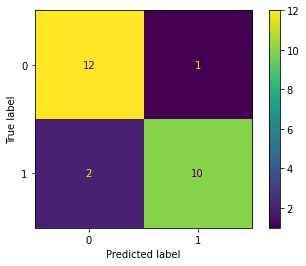

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [66]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt, seaborn as sns

%matplotlib inline
 

# define dataset

df = pd.read_csv("haberman_data.csv")

#dataset.head()                     # Look at the first 5 rows and the col names.

#Separating the features and the target variable

X = dataset.drop('Status', axis = 1) # Putting feature variable to X

y = dataset['Status']  # Target  # I can use the below

 

# now lets split the data into train and test

from sklearn.model_selection import train_test_split

 

# Splitting the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

X_train.shape, X_test.shape

 

from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,

                                       n_estimators=100, oob_score=True)

#%time

classifier_rf.fit(X_train, y_train)

# checking the oob score

classifier_rf.oob_score_

 

rf = RandomForestClassifier(random_state=42, n_jobs=-1)

 

params = {

    'max_depth': [2,3,5,10,20],

    'min_samples_leaf': [5,10,20,50,100,200],

    'n_estimators': [10,25,30,50,100,200]

}

 

from sklearn.model_selection import GridSearchCV

 

# Instantiate the grid search model

grid_search = GridSearchCV(estimator=rf,

                           param_grid=params,

                           cv = 4,

                           n_jobs=-1, verbose=1, scoring="accuracy")

#%time

grid_search.fit(X_train, y_train)

 

grid_search.best_score_

 

rf_best = grid_search.best_estimator_

rf_best

 
# Visualize confusion matrix

#from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix

 
#from sklearn.tree import plot_tree

#plt.figure(figsize=(80,40))

#plot_tree(rf_best.estimators_[5], feature_names = X.columns,class_names=['Death < 5yrs', "No Death"],filled=True);


# Developing and fitting the random forest algorithm

rf = RandomForestClassifier(n_estimators = 10, max_depth = 5, max_features = 'sqrt', random_state = 0).fit(X_train, y_train)

 
# Making predictions

import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split

from sklearn.svm import SVC

X, y = make_classification(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = SVC(random_state=0)

clf.fit(X_train, y_train)

SVC(random_state=0)

predictions = clf.predict(X_test)

cm = confusion_matrix(y_test, predictions, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

disp.plot()

plt.show()

print(classification_report(y_test, predictions, labels = clf.classes_))

              precision    recall  f1-score   support

           0       0.91      0.77      0.83        13
           1       0.79      0.92      0.85        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



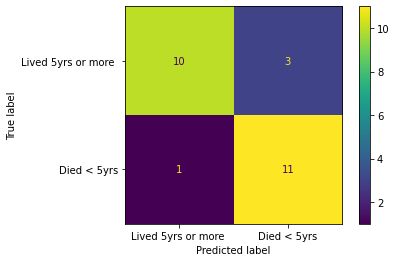

In [67]:
# 2.3 Simple Vector Machine

# Developing and fitting the Support Vector Machine

svm = SVC(random_state = 0, kernel = "linear", gamma = 1).fit(X_train, y_train)

svm_pred = svm.predict(X_test)

cm_svm = confusion_matrix(y_test, svm_pred, labels = clf.classes_)

# Creating the labels

labels = ["Lived 5yrs or more ", "Died < 5yrs"]

disp = ConfusionMatrixDisplay(confusion_matrix = cm_svm, display_labels = labels)

disp.plot()

print(classification_report(y_test, svm_pred, labels = clf.classes_))

In [68]:
# Implement grid search for parameter tuning


parameters = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}

svm_grid = GridSearchCV(svm, parameters)
svm_grid.fit(X_train, y_train)
svm_grid.best_params_

{'C': 10, 'kernel': 'linear'}

In [69]:
#SVR vs. simple linear regression (Y=Status) — 1 independent variable (Nodes)

# Data Manipulation

import pandas as pd # for data manipulation

import numpy as np # for data manipulation

 

# Sklearn

from sklearn.linear_model import LinearRegression # for building a linear regression model

from sklearn.svm import SVR # for building SVR model

from sklearn.preprocessing import MinMaxScaler

 

# Visualizations

import plotly.graph_objects as go # for data visualization

import plotly.express as px # for data visualization

 

# Read in data

df = pd.read_csv('haberman_data.csv', encoding='utf-8')

 

# Use MinMax scaling on Age and Nodes features

scaler=MinMaxScaler()

df['Ages (scaled)']=scaler.fit_transform(df[['Age']])

df['Nodes (scaled)']=scaler.fit_transform(df[['Nodes']])

 
# Note, we need X to be a 2D array, hence reshape

X=df['Nodes'].values.reshape(-1,1)

y=df['Status'].values

 

# ------- Linear regression -------

model1 = LinearRegression()

lr = model1.fit(X, y)

 

# ------- Support Vector regression -------

model2 = SVR(kernel='rbf', C=1, epsilon=10) # set kernel and hyperparameters

svr = model2.fit(X, y)

 

# ------- Predict a range of values based on the models for visualization -------

# Create 100 evenly spaced points from smallest X to largest X

x_range = np.linspace(X.min(), X.max(), 100)

 

# Predict y values for our set of X values

y_lr = model1.predict(x_range.reshape(-1, 1)) # Linear regression

y_svr = model2.predict(x_range.reshape(-1, 1)) # SVR

#************************************************************************* Is it good thus far

# Create a scatter plot

fig = px.scatter(df, x=df['Nodes'], y=df['Status'],

                 opacity=0.8, color_discrete_sequence=['black'])

 

# Add a best-fit line

fig.add_traces(go.Scatter(x=x_range, y=y_lr, name='Linear Regression', line=dict(color='limegreen')))

fig.add_traces(go.Scatter(x=x_range, y=y_svr, name='Support Vector Regression', line=dict(color='red')))

fig.add_traces(go.Scatter(x=x_range, y=y_svr+10, name='+epsilon', line=dict(color='red', dash='dot')))

fig.add_traces(go.Scatter(x=x_range, y=y_svr-10, name='-epsilon', line=dict(color='red', dash='dot')))

 

# Change chart background color

fig.update_layout(dict(plot_bgcolor = 'white'))

 

# Update axes lines

fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',

                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',

                 showline=True, linewidth=1, linecolor='black')

 

fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='lightgrey',

                 zeroline=True, zerolinewidth=1, zerolinecolor='lightgrey',

                 showline=True, linewidth=1, linecolor='black')

 

# Set figure title

fig.update_layout(title=dict(text="Survival status Based on Number of positive axillary nodes detected with Model Predictions (epsilon=10, C=1000)",

                             font=dict(color='black')))

# Update marker size

fig.update_traces(marker=dict(size=3))

 

fig.show()

# Note: Linear regression and SVR model comparison (C=1).  Let's change C=1000

In [70]:
# 2.3B SVR

 

#Support Vector Regression (SVR) with 1 dep V (Y = Status) & 2 independent variables (Age, Nodes - scaled)

#************************************************************

# Data Manipulation

import pandas as pd # for data manipulation

import numpy as np # for data manipulation

 

# Sklearn

from sklearn.linear_model import LinearRegression # for building a linear regression model

from sklearn.svm import SVR # for building SVR model

from sklearn.preprocessing import MinMaxScaler

 

# Visualizations

# pip install plotly   # Need to install this one time.  ???????????? remember to remove #

import plotly.graph_objects as go # for data visualization

import plotly.express as px # for data visualization

 

# Read in data

df = pd.read_csv('haberman_data.csv', encoding='utf-8')

 

# Use MinMax scaling on Age and Nodes features

scaler=MinMaxScaler()

df['Ages (scaled)']=scaler.fit_transform(df[['Age']])

df['Nodes (scaled)']=scaler.fit_transform(df[['Nodes']])

 

# Print Dataframe

#df             #********************************************************* Worked so far

# ----------- Select variables -----------

X=df[['Nodes (scaled)','Ages (scaled)']]

y=df['Status'].values

 

# ----------- Model fitting -----------

# Define models and set hyperparameter values

model1 = LinearRegression()

model2 = SVR(kernel='rbf', C=100, epsilon=1)

 

# Fit the two models

lr = model1.fit(X, y)

svr = model2.fit(X, y)

 

# ----------- For creating a prediciton plane to be used in the visualization -----------

# Set Increments between points in a meshgrid

mesh_size = 0.05

 

# Identify min and max values for input variables

x_min, x_max = X['Nodes (scaled)'].min(), X['Nodes (scaled)'].max()

y_min, y_max = X['Ages (scaled)'].min(), X['Ages (scaled)'].max()

 

# Return evenly spaced values based on a range between min and max

xrange = np.arange(x_min, x_max, mesh_size)

yrange = np.arange(y_min, y_max, mesh_size)

 

# Create a meshgrid

xx, yy = np.meshgrid(xrange, yrange)

 

# ----------- Create a prediciton plane  -----------

# Use models to create a prediciton plane --- Linear Regression

pred_LR = model1.predict(np.c_[xx.ravel(), yy.ravel()])

pred_LR = pred_LR.reshape(xx.shape)

 

# Use models to create a prediciton plane --- SVR

pred_svr = model2.predict(np.c_[xx.ravel(), yy.ravel()])

pred_svr = pred_svr.reshape(xx.shape)

 

# Note, .ravel() flattens the array to a 1D array,

# then np.c_ takes elements from flattened xx and yy arrays and puts them together,

# this creates the right shape required for model input

 

# prediction array that is created by the model output is a 1D array,

# Hence, we need to reshape it to be the same shape as xx or yy to be able to display it on a graph

#************************************************************************* Is it good thus far

# Create a 3D scatter plot with predictions

fig = px.scatter_3d(df, x=df['Nodes (scaled)'], y=df['Ages (scaled)'], z=df['Status'],

                    opacity=0.8, color_discrete_sequence=['black'],

                    width=1000, height=900

                   )

 

# Set figure title and colors

fig.update_layout(title_text="Scatter 3D Plot with SVR Prediction Surface",

                  scene_camera_eye=dict(x=1.5, y=1.5, z=0.25),

                  scene_camera_center=dict(x=0, y=0, z=-0.2),

                  scene = dict(xaxis=dict(backgroundcolor='white',

                                          color='black',

                                          gridcolor='lightgrey'),

                               yaxis=dict(backgroundcolor='white',

                                          color='black',

                                          gridcolor='lightgrey'

                                          ),

                               zaxis=dict(backgroundcolor='white',

                                          color='black',

                                          gridcolor='lightgrey')))

# Update marker size

fig.update_traces(marker=dict(size=2))

 

# Add prediction plane

fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred_svr, name='SVR',

                          colorscale=px.colors.sequential.Sunsetdark,

                          showscale=False))

fig.show()

   Age  Year  Nodes
0   30    64      1
1   30    62      3
2   30    65      0
3   31    59      2
4   31    65      4
0    1
1    1
2    1
3    1
4    1
Name: Status, dtype: int64
              precision    recall  f1-score   support

           0       0.47      0.39      0.42        18
           1       0.77      0.82      0.79        44

    accuracy                           0.69        62
   macro avg       0.62      0.60      0.61        62
weighted avg       0.68      0.69      0.68        62



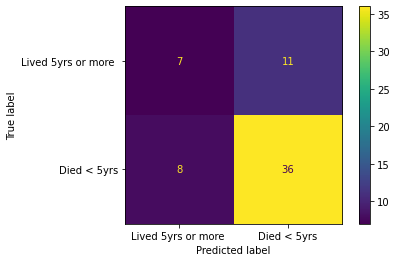

In [71]:
# 2.4 Neural Network 

 

#Import the necessary libraries

import pandas as pd

import matplotlib.pyplot as plt

 

# Scikit learn - machine learning algorithms and methods

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import roc_auc_score, plot_roc_curve

#from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score

 

#from sklearn.preprocessing import StandardScaler

#from sklearn.linear_model import LogisticRegression

#from sklearn.metrics import confusion_matrix

#from sklearn.metrics import classification_report

 

# Load the Data

data = pd.read_csv('haberman_data.csv')

data.head()        #Look at the few and columns

 

# In Status column replace 2 with 0 (failure = patient died within 5 year) and '1' (survived 5 or more yrs)

data.Status = data.Status.mask(data.Status == 2, 0)

data                       #view the data

 

# Separate the data for Dep V and Indep Vs

y = data['Status']

X = data.drop('Status', axis = 1)

print(X.head())

print(y.head())

 

#split and scale the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

 

#We use a standard scaler to scale the features for preprocessing

scaler = StandardScaler()

scale = scaler.fit(X_train)

X_train = scale.fit_transform(X_train)

X_test = scale.transform(X_test)

 

#Create the Logistic Regression Model

model = LogisticRegression()

model.fit(X_train,y_train)

pred = model.predict(X_test)

 

# Defining and training the model

clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

# Evaluating the model

clf.score(X_test, y_test)

# Making predictions

y_pred = clf.predict(X_test)

# Creating the labels

labels = ["Lived 5yrs or more ", "Died < 5yrs"]

 

# Developing and fitting the Neural Network

 

nn = MLPClassifier(solver = 'lbfgs',  max_iter= 1000, alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

 

nn_pred = nn.predict(X_test)

 

cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)

disp.plot()

print(classification_report(y_test, nn_pred, labels = clf.classes_))

>LogisticRegression: ideal=0.742, cv=0.739
>RandomForestClassifier: ideal=0.683, cv=0.680
>SVC: ideal=0.725, cv=0.729
>MLPClassifier: ideal=0.745, cv=0.759
Correlation: 0.981


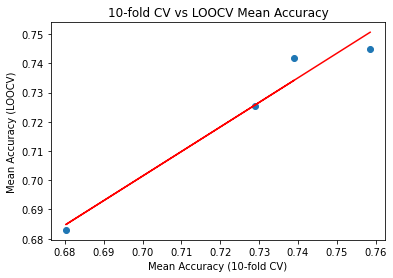

In [72]:
#10 - fold cross validation of the Models

# correlation between test harness and ideal test condition

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

 

from numpy import mean

from numpy import isnan

from numpy import asarray

from numpy import polyfit

from scipy.stats import pearsonr

from matplotlib import pyplot

from sklearn.datasets import make_classification

from sklearn.model_selection import KFold

from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import RidgeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import ExtraTreeClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier

#*************************************************

# Import the Data- Creates dataFrame called Data

data = pd.read_csv('haberman_data.csv')

#data.head()      #Look at the few and columns

#*************************************************

# In Status column replace 2 with 0 (failure = patient died within 5 year) and '1' (survived 5 or more yrs)

data.Status = data.Status.mask(data.Status == 2, 0)

data                       #view the data

#*************************************************
#selecting the dependent variable y and independent variable X

depy = data['Status']

indepX = data.drop('Status', axis = 1) # Use all variables except 'Status'

#*************************************************

# create the dataset

#def get_dataset(n_samples=100):

def get_dataset():

    #X, y = make_classification(n_samples=n_samples, n_features=20, n_informative=15, n_redundant=5, random_state=1)

    # Separate the data for Dep V and Indep Vs

    #y = data['Status']

    #X = data.drop('Status', axis = 1)

    y = depy.to_numpy()

    X = indepX.to_numpy()

    return X, y

#*************************************************

def get_models():

    models = list()

    models.append(LogisticRegression())

    models.append(RandomForestClassifier())

    models.append(SVC())

    models.append(MLPClassifier())

    return models

#*************************************************

# evaluate the model using a given test condition

def evaluate_model(cv, model):

    # get the dataset

    X, y = get_dataset()

   # evaluate the model

    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

    # return scores

    return mean(scores)

#*************************************************

# define test conditions

ideal_cv = LeaveOneOut()

cv = KFold(n_splits=10, shuffle=True, random_state=1)

# get the list of models to consider

models = get_models()

# collect the results

ideal_results, cv_results = list(), list()

#*************************************************

# evaluate each model

for model in models:

    # evaluate model using each test condition

    cv_mean = evaluate_model(cv, model)

    ideal_mean = evaluate_model(ideal_cv, model)

    # check for invalid results

    if isnan(cv_mean) or isnan(ideal_mean):

        continue

    # store results

    cv_results.append(cv_mean)

    ideal_results.append(ideal_mean)

    # summarize progress

    print('>%s: ideal=%.3f, cv=%.3f' % (type(model).__name__, ideal_mean, cv_mean))

    #*************************************************

# calculate the correlation between each test condition

corr, _ = pearsonr(cv_results, ideal_results)

print('Correlation: %.3f' % corr)

# scatter plot of results

pyplot.scatter(cv_results, ideal_results)

# plot the line of best fit

coeff, bias = polyfit(cv_results, ideal_results, 1)

line = coeff * asarray(cv_results) + bias

pyplot.plot(cv_results, line, color='r')

# label the plot

pyplot.title('10-fold CV vs LOOCV Mean Accuracy')

pyplot.xlabel('Mean Accuracy (10-fold CV)')

pyplot.ylabel('Mean Accuracy (LOOCV)')

# show the plot

pyplot.show()   

# Question 2 & 3

#### Comparison of the 4 methods using a 10 fold cross validation and grid search quotient of variation

- Ideal is the Accuracy Score
- cv is cross-validation

Here are the 10 fold cross validation (cv) versus Accuracy (A) results:
- LogisticRegression: cv=0.739, A = 0.61-----> Overfitting by 0.129
- RandomForestClassifier:cv=0.670, A= 0.88---> Underfitting by -0.21
- SVC: cv=0.729, A= 0.84---------------------> Underfitting by -0.111
- MLPClassifier(neural network):cv=0.762, 0.69-->Overfitting by 0.079 (THIS IS THE BEST MODEL FOR THIS PROBLEM- see below ofr explanation

Analysis:
- The accuracy for the Random Forest Model is the best, but it's uderfitted by the most difference (-0.21), therefore it's not the best model. 
- The cross validation for the Neural Network Model scored the highest in the cv, and is the least overfitted of all the models, therefore it's the best model for this problem. 

# Question 4

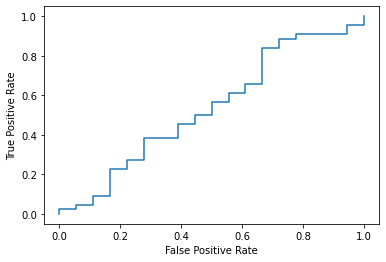

SyntaxError: 'return' outside function (Temp/ipykernel_10728/838224209.py, line 198)

In [73]:
#(**********************************************)

#A function to implement machine learning based an Algorithm passed in as an argument.

#(**********************************************)

#Import Libraries

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

#******************************************

from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score

from sklearn.metrics import classification_report

from sklearn.metrics import roc_auc_score

from sklearn.metrics import log_loss

from numpy import mean

from numpy import isnan

from numpy import asarray

from numpy import polyfit

from scipy.stats import pearsonr

from matplotlib import pyplot

from sklearn.datasets import make_classification

from sklearn.model_selection import KFold

from sklearn.model_selection import LeaveOneOut

from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression

from sklearn.linear_model import RidgeClassifier

from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import ExtraTreeClassifier

from sklearn.svm import LinearSVC

from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import BaggingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import ExtraTreesClassifier

from sklearn.gaussian_process import GaussianProcessClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.preprocessing import StandardScaler

#(**********************************************)
def get_dataset(data):

    # Separate the data for Dep V and Indep Vs

    depy = data['Status']

    indepX = data.drop('Status', axis = 1)

    # Create an array from the dataFrame

    y = depy.to_numpy()

    X = indepX.to_numpy()

    return X, y
#(**********************************************)

def machine_learning(data, algorithm):

    #A function to implement machine learning based an Algorithm passed in as an argument.

    #print(data)

    X, y = get_dataset(data)

    #split and scale the dataset into training (70%) and testing (30%) sets

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

    #We use a standard scaler to scale the features for preprocessing

    scaler = StandardScaler()

    scale = scaler.fit(X_train)

    X_train = scale.fit_transform(X_train)

    X_test = scale.transform(X_test)

    # Defining and train the model

    clf = LogisticRegression(solver = "lbfgs", penalty = "l2", C = 0.01, random_state = 10).fit(X_train, y_train)

    # Evaluating the model

    clf.score(X_test, y_test)

    # Making predictions

    y_pred = clf.predict(X_test)
      

# Developing and fitting the Neural Network

 

nn = MLPClassifier(solver = 'lbfgs',  max_iter=1000, alpha = 0.0001, hidden_layer_sizes = (15,), random_state = 1, activation = "relu", learning_rate_init = 0.01).fit(X_train, y_train)

 

nn_pred = nn.predict(X_test)

#labels = clf.classes_

#return y_test, nn_pred    #, labels = clf.classes_

#cm_nn = confusion_matrix(y_test, nn_pred, labels = clf.classes_labels = clf.classes_

#disp = ConfusionMatrixDisplay(confusion_matrix = cm_nn, display_labels = labels)

 

#**************************************

#instantiate the model

log_regression = LogisticRegression()

#fit the model using the training data

log_regression.fit(X_train,y_train)

   

#define metrics

y_pred_proba = log_regression.predict_proba(X_test)[::,1]

fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve

plt.plot(fpr,tpr)

plt.ylabel('True Positive Rate')

plt.xlabel('False Positive Rate')

plt.show()

#**************************************

# Calculate and return performance metrics

#results = confusion_matrix(X_train, y_pred_proba)

#print ('Confusion Matrix :')

return classification_report(y_test, nn_pred, labels = clf.classes_)   #return performance_metrics

   
#(**********************************************)

# Begin program execution here and Load the Data

data = pd.read_csv('haberman_data.csv')

# In Status column replace 2 with 0 (failure = patient died within 5 year) and '1' (survived 5 or more yrs)

data.Status = data.Status.mask(data.Status == 2, 0)

df = pd.DataFrame(data)

#df

#Get or initiate the model or algorithm you want

model = "MLPClassifier"       #for Neural Network

classReport = machine_learning(df, model)        #Function Call

print(classReport)

#(**********************************************)